In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('nuclear_plant_outages_PCT_transformed.csv', 
                 index_col='Date',
                 na_filter=True)

,Arkansas Nuclear One,Beaver Valley,Braidwood Generation Station,Browns Ferry,Brunswick,Byron Generating Station,Callaway,Calvert Cliffs Nuclear Power Plant,Catawba,Clinton Power Station,...,St Lucie,Surry,Three Mile Island,Turkey Point,V C Summer,Vermont Yankee,Vogtle,Waterford 3,Watts Bar Nuclear Plant,Wolf Creek Generating Station
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,0.0,0.0,0.0,32.65,8.00,0.0,0,0.00,6.50,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007-01-02,0.0,0.0,0.0,32.65,9.99,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007-01-03,0.0,0.0,0.0,32.65,2.50,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007-01-04,0.0,0.0,0.0,32.98,4.00,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
2007-01-05,0.0,0.0,0.0,32.98,0.00,0.0,0,0.00,0.00,4,...,0.0,10.0,0.0,0.0,0,0.0,0.99,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,0.0,0.0,0.0,7.00,0.00,0.0,0,50.34,0.00,0,...,0.5,0.0,NaN,0.0,0,NaN,0.00,0,2.48,0
2022-02-19,0.0,0.0,0.0,18.35,0.00,0.0,0,50.34,0.99,0,...,0.5,0.0,NaN,0.0,0,NaN,0.00,0,2.48,0
2022-02-20,0.0,0.0,0.0,11.34,0.00,0.0,0,50.34,0.00,0,...,0.5,0.0,NaN,0.0,0,NaN,0.00,0,2.48,0


In [3]:
df.dropna(axis='columns', inplace=True)

<AxesSubplot:xlabel='Date'>

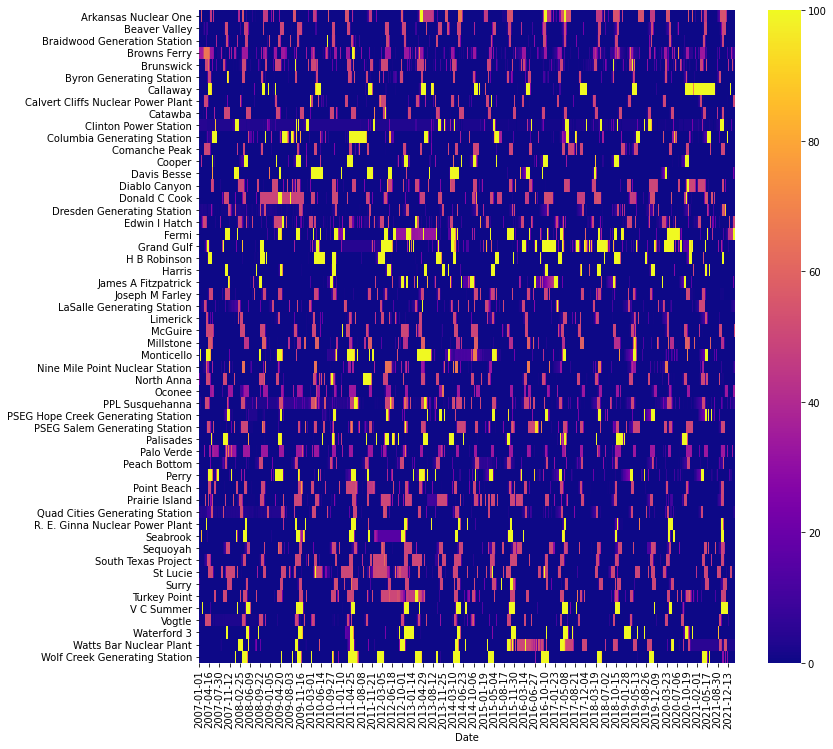

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=df.T, cmap='plasma')

In [6]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [7]:
X = df.iloc[:,:].values
X

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 2.48, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 2.48, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 2.48, 0.  ]])

In [8]:
# dendrogram = sch.dendrogram(sch.linkage(X.T, method='ward'))

In [99]:
model = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
model.fit(X.T)
labels = model.labels_

In [100]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
len(labels)

54

In [102]:
tpose = df.copy().T
# tpose

In [103]:
tpose['cluster'] = labels
tpose.head(6)

Date,2007-01-01,2007-01-02,2007-01-03,2007-01-04,2007-01-05,2007-01-06,2007-01-07,2007-01-08,2007-01-09,2007-01-10,...,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,cluster
Arkansas Nuclear One,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0
Beaver Valley,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0
Braidwood Generation Station,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0
Browns Ferry,32.65,32.65,32.65,32.98,32.98,32.98,33.32,32.65,32.65,32.65,...,7.00,7.0,7.0,7.34,7.0,18.35,11.34,8.0,8.00,1
Brunswick,8.00,9.99,2.50,4.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.97,0.0,0.0,0.00,0.0,0.00,0.00,0.0,11.86,1
Byron Generating Station,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,1


In [104]:
grouped = tpose.groupby(tpose['cluster'])
heights = []
for g in grouped.groups:
    print(g)
    heights.append(len(grouped.get_group(g)))
heights

0
1
2
3
4
5
6
7
8
9


[24, 17, 2, 2, 4, 1, 1, 1, 1, 1]

In [105]:
sorted_T = tpose.sort_values(by='cluster')

In [106]:
L = len(tpose.T)

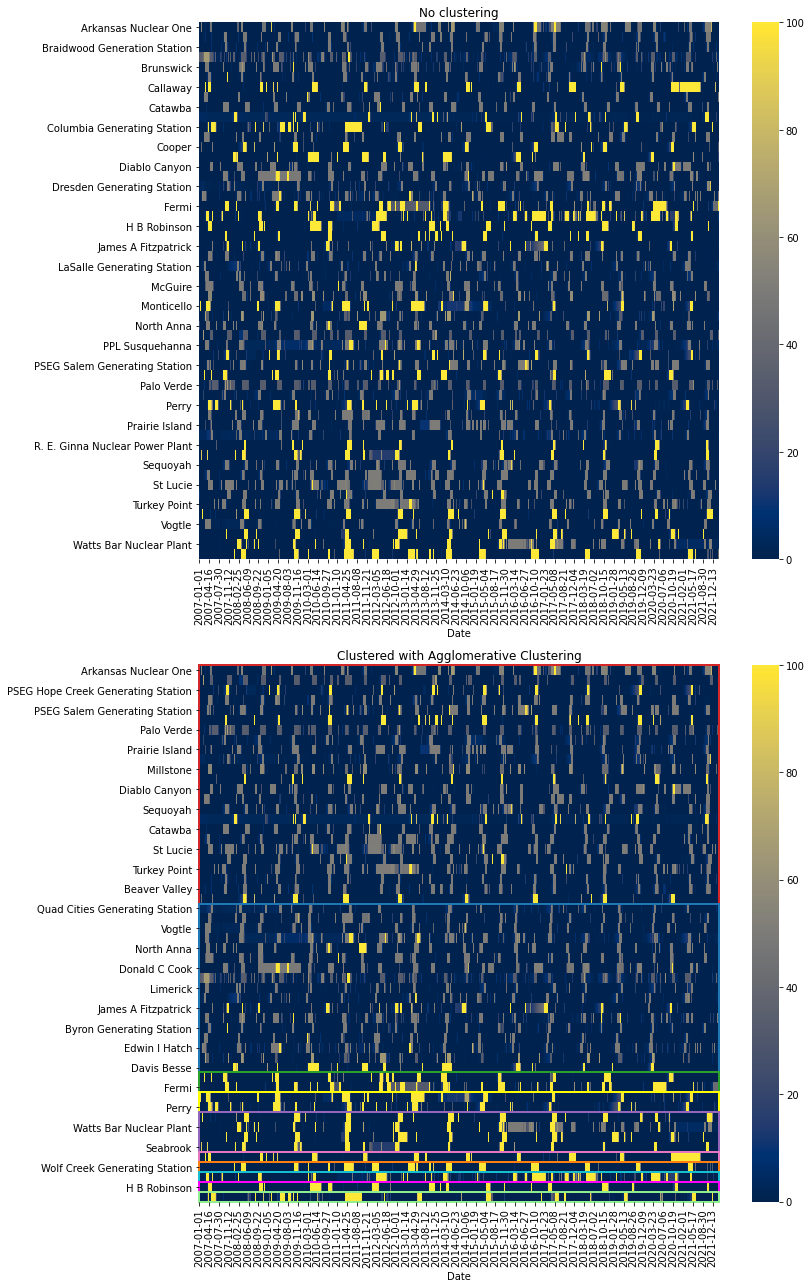

In [111]:
cmap = 'cividis'
from matplotlib.patches import Rectangle
fig, axes = plt.subplots(2,figsize=(12,18))
sb.heatmap(ax=axes[0],data=df.T, cmap=cmap)
# sb.heatmap(ax=axes[1],data=tpose.sort_values(by='cluster'), cmap='plasma')
sb.heatmap(ax=axes[1],data=sorted_T, cmap=cmap)

colors=['tab:red','tab:blue','tab:green','yellow','tab:purple', 'tab:pink','tab:orange','tab:cyan','magenta',
        'lightgreen']

for i, h in enumerate(heights):
    name_idx=sorted_T[sorted_T.cluster==i].index.values[0]
    idx = np.where(sorted_T.index==name_idx)[0][0]
    
    axes[1].add_patch(Rectangle((0,idx), 
                                width=L, 
                                height=h, 
                                fill=False, 
                                edgecolor=colors[i], 
                                lw=2, 
                                clip_on=False))
    
axes[0].set_title('No clustering')
axes[1].set_title('Clustered with Agglomerative Clustering')
plt.tight_layout()

In [ ]:
from matplotlib.patches import Rectangle
fig, axes = plt.subplots(1,figsize=(12,12))
# sb.heatmap(ax=axes[0],data=df.T, cmap='plasma')
sb.heatmap(ax=axes,data=sorted_T, cmap='cividis')

colors=['tab:red','tab:blue','tab:green','yellow','tab:purple']

for i, h in enumerate(heights):
    name_idx=sorted_T[sorted_T.cluster==i].index.values[0]
    idx = np.where(sorted_T.index==name_idx)[0][0]
    print(idx, name_idx, colors[i])
    
    axes.add_patch(Rectangle((0,idx), 
                                width=L, 
                                height=h, 
                                fill=False, 
                                edgecolor=colors[i], 
                                lw=4, 
                                clip_on=False))
plt.tight_layout()